# Chapter 3. Linear Regression

## Lab

In [1]:
library("MASS")
library("ISLR")
library("IRdisplay")
library("ggplot2")
library("ggfortify")
library("lsr")
library("GGally")
library("pheatmap")
library("gridExtra")
library("RColorBrewer")
library("foreach")

### Simple Linear Regression

In [2]:
head(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

Let’s try to predict **medv** using the others as predictors.

In [3]:
lm.fit <- lm(medv ~ lstat, data = Boston)
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [4]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [5]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

Confidence interval of the coefficient estimates.

In [6]:
confint(lm.fit)

2.5 %     97.5 %    
(Intercept) 33.448457 35.6592247
lstat       -1.026148 -0.8739505

In [7]:
display_markdown("#### Confidence Intervals")
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = "confidence")
display_markdown("#### Prediction Intervals")
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = "prediction")

#### Confidence Intervals

fit      lwr      upr     
1 29.80359 29.00741 30.59978
2 25.05335 24.47413 25.63256
3 20.30310 19.73159 20.87461

#### Prediction Intervals

fit      lwr       upr     
1 29.80359 17.565675 42.04151
2 25.05335 12.827626 37.27907
3 20.30310  8.077742 32.52846

To remember, *prediction intervals* are always wider than the 
*confidence intervals*.

Remember we are approximating $y = f(x) + \epsilon$. Thus:

- **Confidence interval**: quantify the uncertainty of the surrounding the 
    *average*.  We interpret it as 95% of the confidence intervals will contain
    the actual $f(X)$.
- **Prediction interval**: even if we knew the actual $f(X)$, how much the
    prediction would vary? This is the prediction error plus the irreducible
    error $\epsilon$. We interpret it as 95% of the prediction intervals will contain 
    $y$.


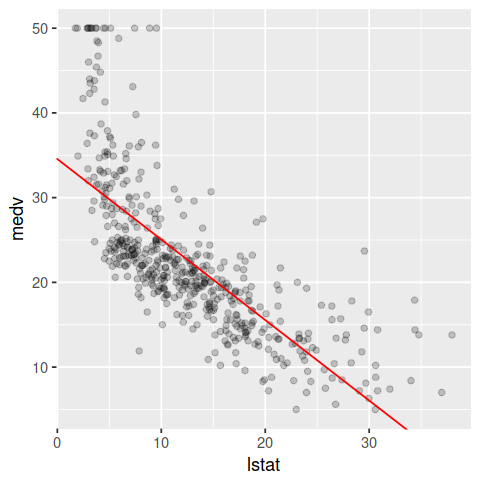

In [8]:
options(repr.plot.width = 4, repr.plot.height = 4)

ggplot(Boston, aes(lstat, medv)) + 
    geom_point(alpha = 0.2) +
    geom_abline(
        intercept = coef(lm.fit)[1],
        slope = coef(lm.fit)[2],
        colour = "red")

This looks somewhat non-linear.

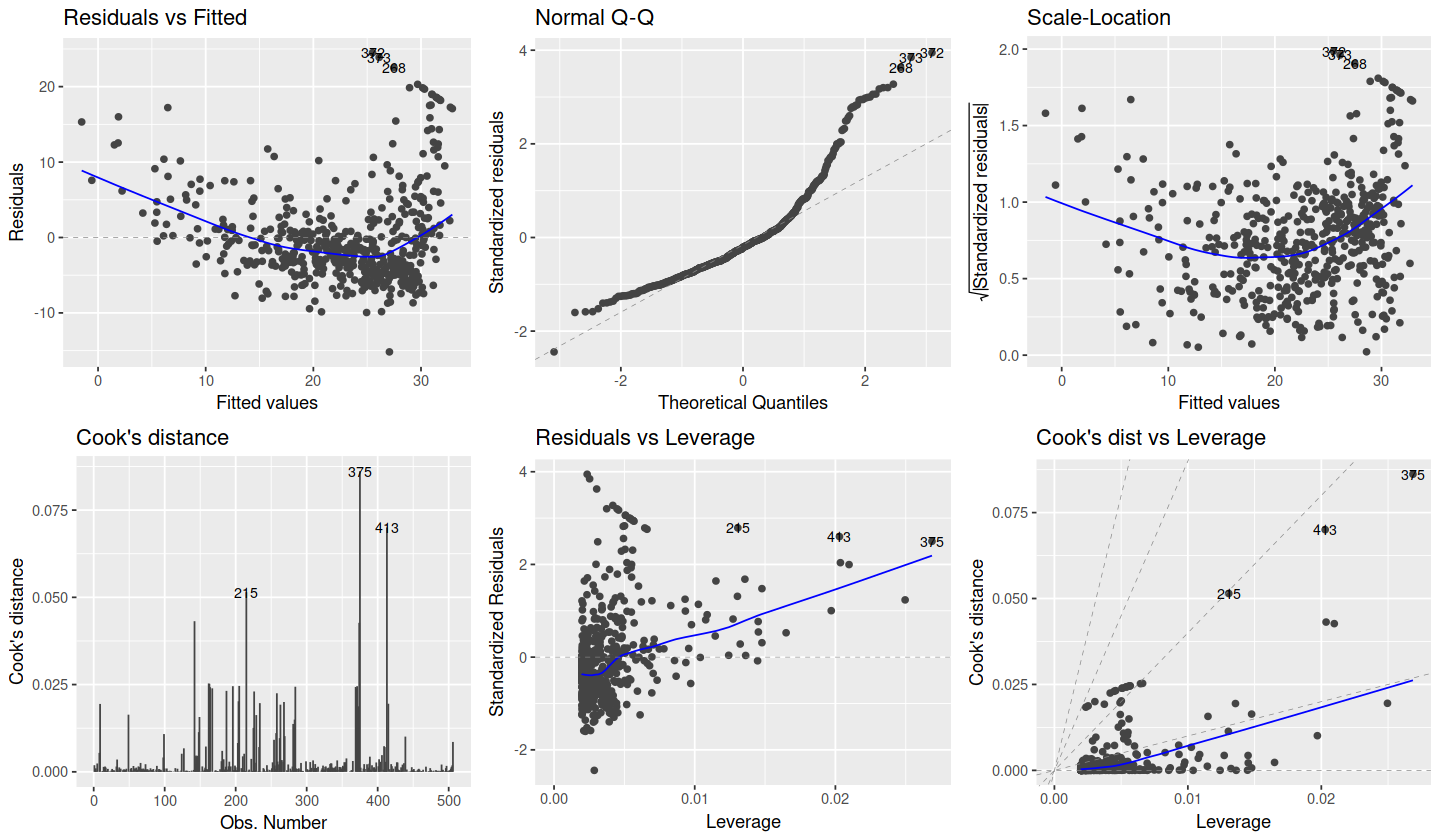

In [9]:
options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit, which = 1:6, ncol = 3, label.size = 3)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. There are not visible outliers in this data.

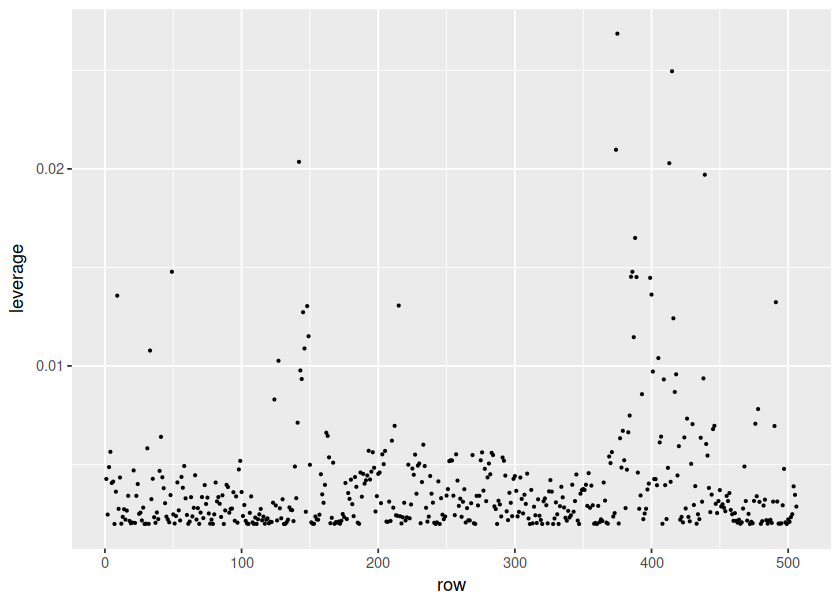

In [10]:
options(repr.plot.width = 7, repr.plot.height = 5)
leverage <- cbind(row=1:nrow(Boston), leverage=hatvalues(lm.fit))
ggplot(leverage, aes(row, leverage)) + geom_point(size = 0.5)

### Multiple Linear Regression

In [11]:
lm.fit <- lm(medv ~ lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [12]:
lm.fit <- lm(medv ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [13]:
library("car")

vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

In [14]:
lm.fit <- lm(medv ~ . - age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

### Interaction Terms

In [15]:
summary(lm(medv ~ lstat * age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### Non-linear Transformations of the Predictors

In [16]:
lm.fit2 <- lm(medv ~ lstat + I(lstat^2), data = Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Hypothesis test. Null hypothesis is that the `lm.fit2` fits the data equally well as `lm.fit`. 
The alternative hypethesis is that the `lm.fit2` is superior.

In [17]:
lm.fit <- lm(medv ~ lstat, data = Boston)
anova(lm.fit, lm.fit2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 504    19472.38 NA       NA        NA           NA
2 503    15347.24  1 4125.138  135.1998 7.630116e-28

The **F** is 135 with a *p* pratically zero. We reject the null hypothesis.
Thus, the **lstat**² improved a lot the model.

In [18]:
lm.fit5 <- lm(medv ~ poly(lstat, 5), data = Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


In [19]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


### Qualitative Predictors

In [20]:
head(Carseats)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1  9.50 138        73    11          276        120   Bad       42  17       
2 11.22 111        48    16          260         83   Good      65  10       
3 10.06 113        35    10          269         80   Medium    59  12       
4  7.40 117       100     4          466         97   Medium    55  14       
5  4.15 141        64     3          340        128   Bad       38  13       
6 10.81 124       113    13          501         72   Bad       78  16       
  Urban US 
1 Yes   Yes
2 Yes   Yes
3 Yes   Yes
4 Yes   Yes
5 Yes   No 
6 No    Yes

In [21]:
lm.fit <- lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

To see which dummies `R` has used:

In [22]:
contrasts(Carseats$ShelveLoc)

Good Medium
Bad    0    0     
Good   1    0     
Medium 0    1

Since **ShelveLocGood** in the regression output is positive indicates that a good
shelving location is associated with high sales (relative to a bad location).
And
**ShelveLocMedium**
has a smaller positive coefficient, indicating that a
medium shelving location leads to higher sales than a bad shelving location
but lower sales than a good shelving location.

## Applied

### Exercise 8

This question involves the use of simple linear regression on the **Auto MPG** data set. 

In [23]:
auto <- read.csv("data/Auto.csv", header = TRUE, na.strings = "?")
auto <- na.omit(auto)
rownames(auto) <- paste(auto$name, rownames(auto))
auto <- auto[, -ncol(auto)]

#### Exercise 8a

Use the `lm()` function to perform a simple linear regression with **mpg** as the response and 
**horsepower** as the predictor. Use the `summary()` function to print the results. 
Comment on the output.

In [24]:
lm.fit <- lm(mpg ~ horsepower, data = Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


1. Is there a relationship between the predictor and the response?

*Answer:* Yes. An increase in **horsepower** decreases the fuel efficiency **mpg**.

2. How strong is the relationship between the predictor and the response? 

*Answer:* The p-value is near zero, indicating a strong relationship.

3. Is the relationship between the predictor and the response positive or negative? 

*Answer:* Negative, -0.158.

4. What is the predicted **mpg** associated with a horsepower of 98? What are the associated 95% conﬁdence and prediction intervals?

In [25]:
display_markdown("#### Confidence Intervals")
predict(lm.fit, data.frame(horsepower = c(98)), interval = "confidence")
display_markdown("#### Prediction Intervals")
predict(lm.fit, data.frame(horsepower = c(98)), interval = "prediction")

#### Confidence Intervals

fit      lwr      upr     
1 24.46708 23.97308 24.96108

#### Prediction Intervals

fit      lwr     upr     
1 24.46708 14.8094 34.12476

#### Exercise 10b

Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

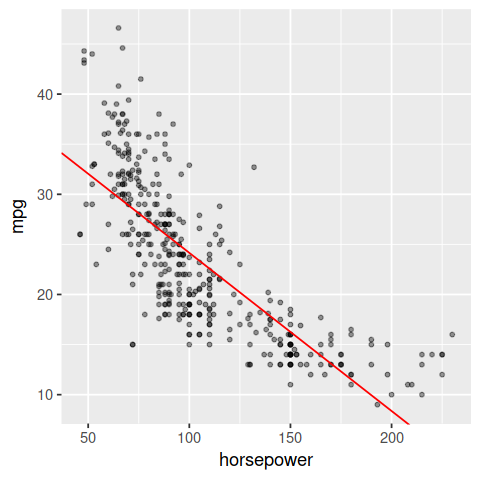

In [26]:
options(repr.plot.width = 4, repr.plot.height = 4)

ggplot(Auto, aes(horsepower, mpg)) + 
    geom_point(size = 1, alpha = 0.4) + 
    geom_abline(intercept = coef(lm.fit)[1], 
                slope = coef(lm.fit)[2],
                colour = "red")

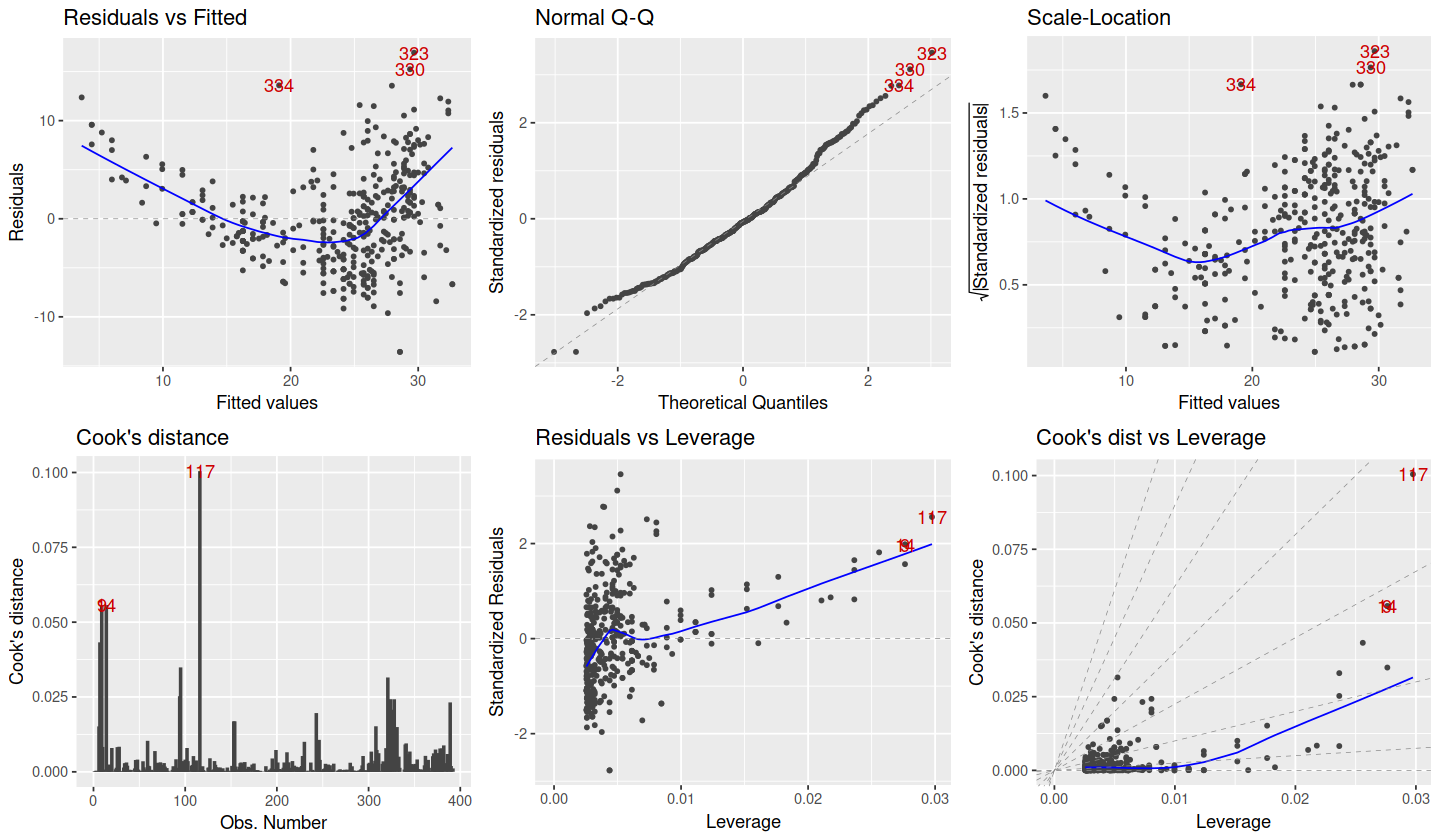

In [27]:
library("ggfortify")

options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. We might have two outliers, 94 and 117 — both shown by the Cook’s distance.

### Exercise 9

This question involves the use of multiple linear regression on the **Auto MPG** data set.

#### Exercise 9a

Produce a scatter plot matrix which includes all of the variables in the data set.

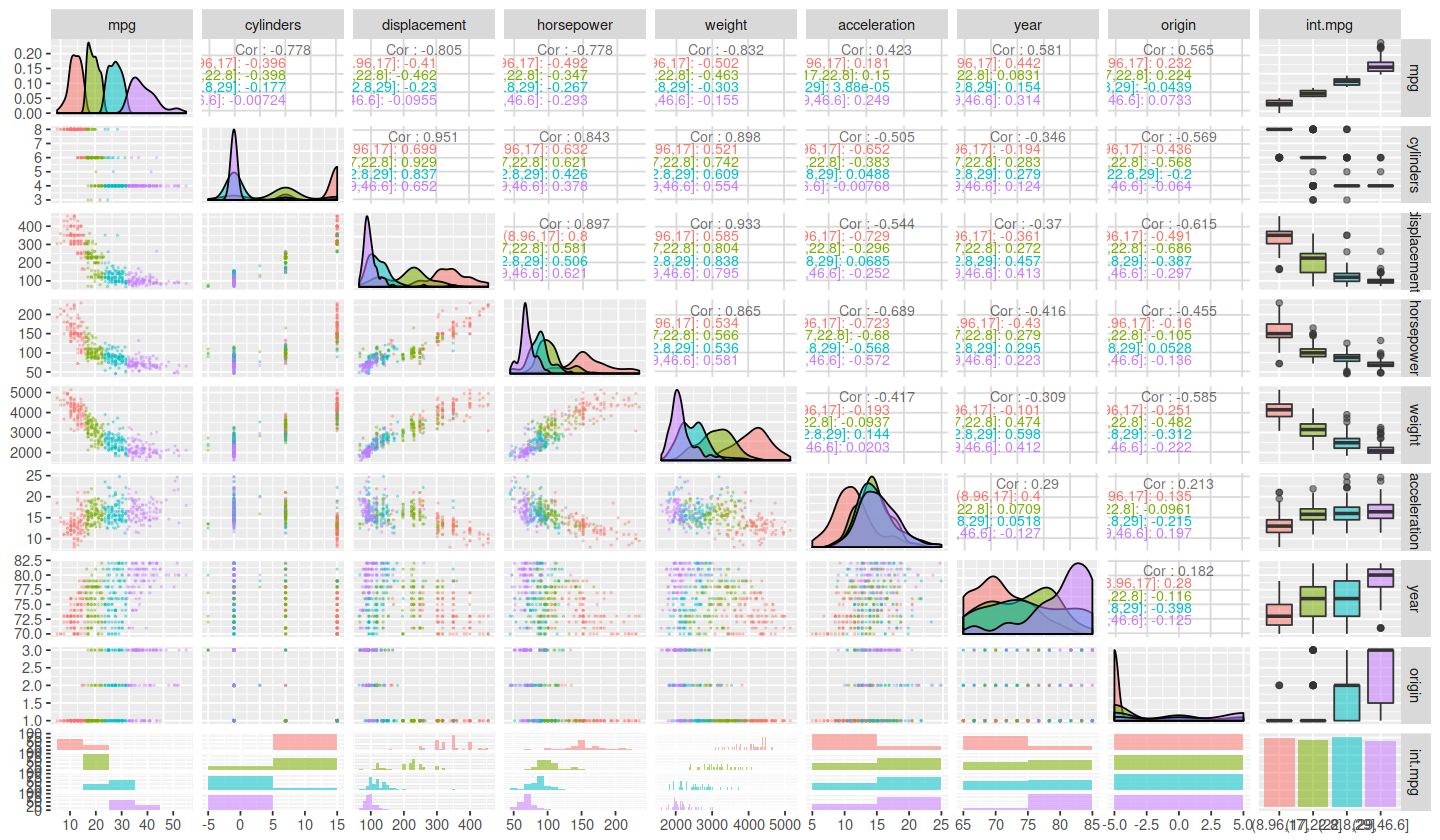

In [28]:
auto.no.name <- Auto[, which(colnames(Auto) != "name")]

auto.no.name$int.mpg <- quantileCut(auto.no.name$mpg, 4)

suppressWarnings(print(ggpairs(
    auto.no.name, 
    aes(alpha = 0.4, color = int.mpg),
    lower = list(
        combo = wrap("facethist", binwidth = 10), 
        continuous = wrap("points", alpha = 0.3, size = 0.3)), 
    upper = list(
        continuous = wrap("cor", size = 3)))))

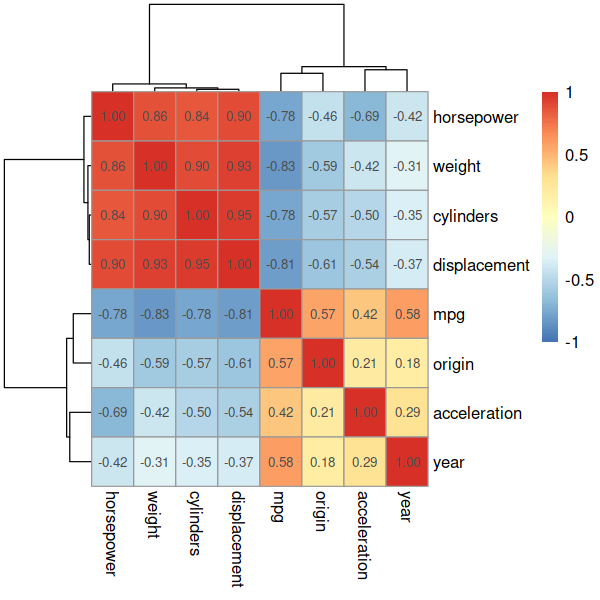

In [29]:
options(repr.plot.width = 5, repr.plot.height = 5)

pheatmap(cor(Auto[, which(names(Auto) != "name")], use="pairwise.complete.obs"), 
         display_numbers = TRUE,
         breaks = seq(-1, 1, 0.02))

#### Exercise 9c

Use the `lm()` function to perform a multiple linear regression with **mpg** as the response and all other variables except **name** as the predictors. Use the `summary()` function to print the results. Comment on the output.

In [30]:
lm.fit <- lm(mpg ~ . - name, data = Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


1. Is there a relationship between the predictors and the response?

The $F$ is the ratio of two variances ($SSR/SSE$), the variance explained by the parameters in the model (sum of squares of regression, SSR) and the residual or unexplained variance (sum of squares of error, SSE). 

The F-statistic shown in the last row, and its respective p-value, is the statistic for the following null hypothesis:

$H_0: \beta_i , \forall i$, that is, all non-constant coefficients are zero

against the alternative hypothesis

$H_a:$ at least one of the non-constant coefficients is non-zero.

Thus, we may conclude there is at least one predictor related with the **mpg** measure.

2. Which predictors appear to have a statistically signiﬁcant relationship to the response?

Looking at the p-values, we can say that **weight**, **year**, **origin**, and **displacement** are the predictors with relationship.

3. What does the coeﬃcient for the year variable suggest?

The **year** coefficient suggests that the cars fuel efficiency increased by 0.75 mile per gallon per year — 0.75 mpg/year.

#### Exercise 9d

Use the `plot()` function to produce diagnostic plots of the linear regression ﬁt. Comment on any problems you see with the ﬁt.

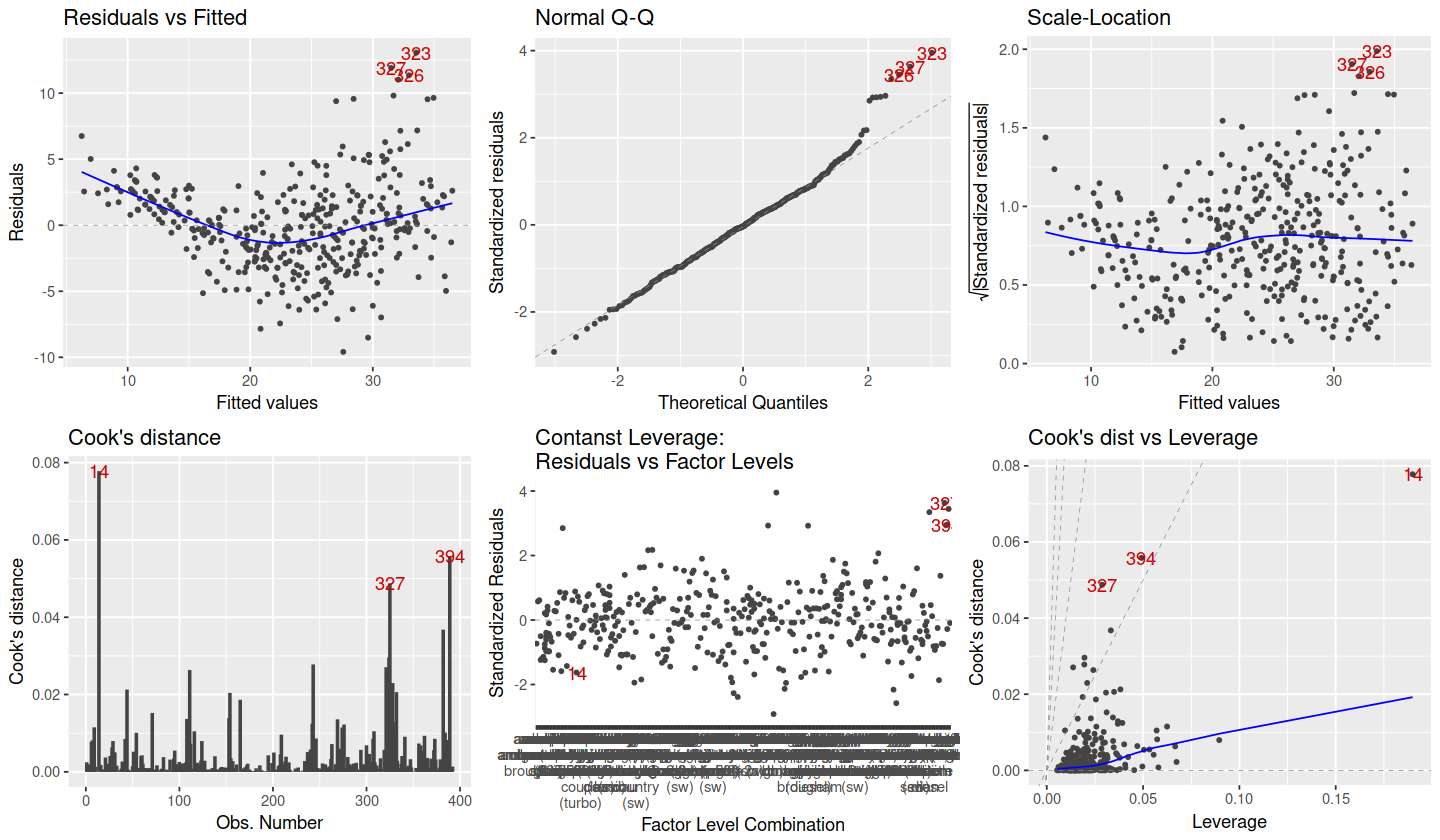

In [31]:
options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. Particularly, the observation 14 seems to be an outlier.

Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

There are three possible outliers — observations 14, 327, and 334:

In [32]:
Auto[c(14, 327, 334), ]

mpg  cylinders displacement horsepower weight acceleration year origin
14  14.0 8         455          225        3086   10.0         70   1     
329 30.0 4         146           67        3250   21.8         80   2     
338 32.4 4         107           72        2290   17.0         80   3     
    name                   
14  buick estate wagon (sw)
329 mercedes-benz 240d     
338 honda accord

I will remove the observation 14 for the rest of this exercise:

In [33]:
auto.clean <- auto[-c(14, 327, 334), ]

#### Exercise 9e

Use the `*` and `:` symbols to ﬁt linear regression models with interaction eﬀects. Do any interactions appear to be statistically signiﬁcant?

In [34]:
auto.no.name <- auto.clean[, which(names(Auto) != "name")]

lm.fit <- lm(mpg ~ .*., data = auto.no.name)
summary(lm.fit)


Call:
lm(formula = mpg ~ . * ., data = auto.no.name)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6786 -1.4665  0.0921  1.3038 11.1578 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.605e+01  5.356e+01   0.673  0.50126   
cylinders                  6.820e+00  8.282e+00   0.824  0.41076   
displacement              -4.782e-01  1.900e-01  -2.517  0.01226 * 
horsepower                 4.864e-01  3.491e-01   1.393  0.16442   
weight                     5.381e-03  1.778e-02   0.303  0.76234   
acceleration              -5.952e+00  2.195e+00  -2.711  0.00702 **
year                       6.877e-01  6.146e-01   1.119  0.26390   
origin                    -2.084e+01  7.123e+00  -2.926  0.00365 **
cylinders:displacement    -2.751e-03  6.587e-03  -0.418  0.67650   
cylinders:horsepower       1.127e-02  2.451e-02   0.460  0.64603   
cylinders:weight           2.640e-04  9.561e-04   0.276  0.78256   
cylinders:acceleratio

The interactions **displacement:year**, **acceleration:year**, and **acceleration:origin** seem to be relevant.

In [35]:
lm.fit <- lm(mpg ~ . + displacement:year + acceleration:year + acceleration:origin, 
             data = Auto[, which(names(Auto) != "name")])
summary(lm.fit)


Call:
lm(formula = mpg ~ . + displacement:year + acceleration:year + 
    acceleration:origin, data = Auto[, which(names(Auto) != "name")])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7659 -1.8996  0.0241  1.4837 12.2739 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         11.8757343 27.4715000   0.432   0.6658    
cylinders           -0.1269380  0.3026441  -0.419   0.6751    
displacement         0.1708125  0.0430357   3.969 8.62e-05 ***
horsepower          -0.0370510  0.0126847  -2.921   0.0037 ** 
weight              -0.0048741  0.0006195  -7.868 3.76e-14 ***
acceleration        -3.6459893  1.4303639  -2.549   0.0112 *  
year                 0.5476463  0.3561807   1.538   0.1250    
origin              -7.0940248  1.5825945  -4.483 9.77e-06 ***
displacement:year   -0.0022809  0.0005711  -3.994 7.81e-05 ***
acceleration:year    0.0374758  0.0186441   2.010   0.0451 *  
acceleration:origin  0.5078440  0.0957537   5.304 1.93e-0

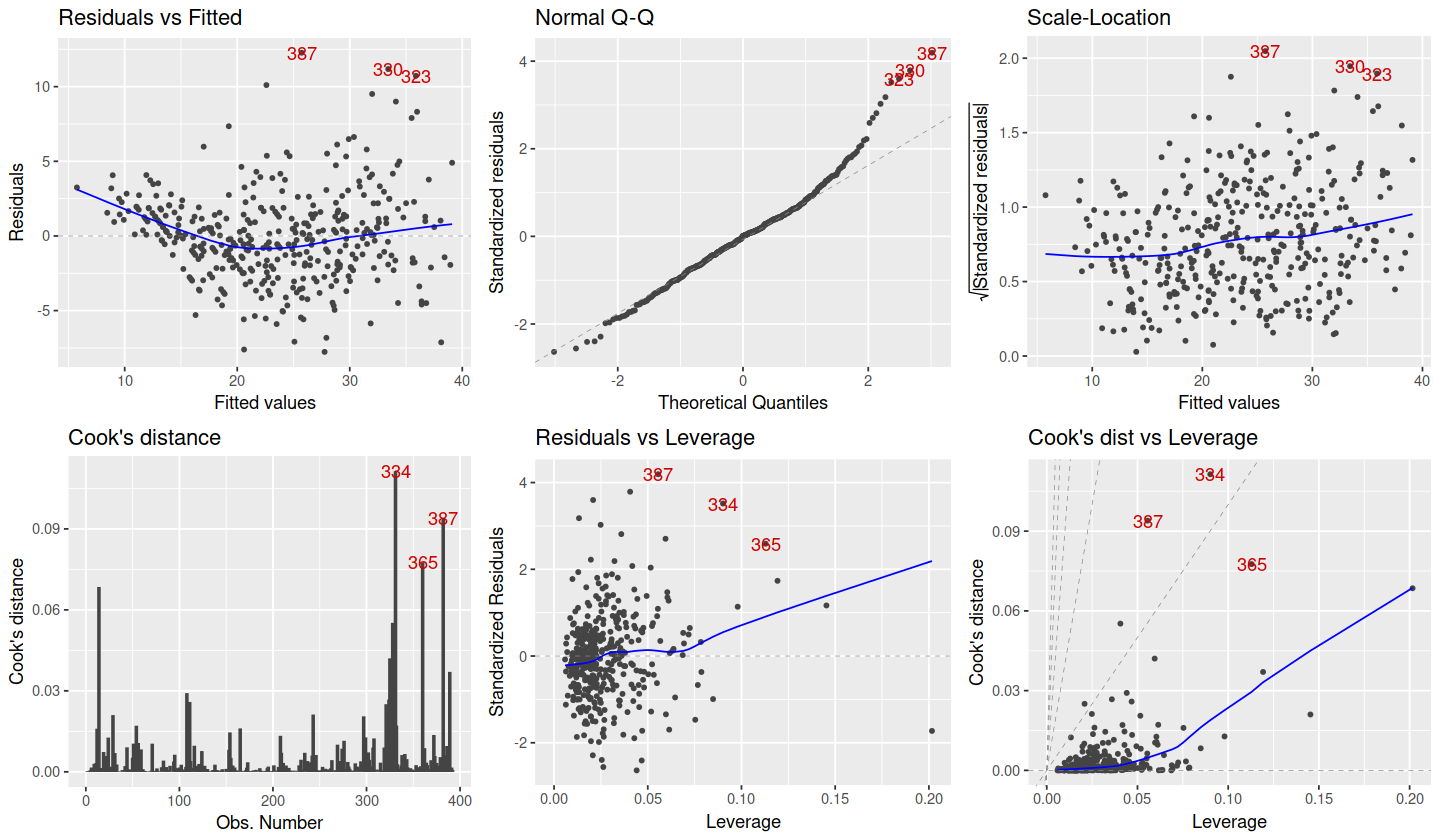

In [36]:
library("ggfortify")

options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)

#### Exercise 9f

Try a few diﬀerent transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your ﬁndings.

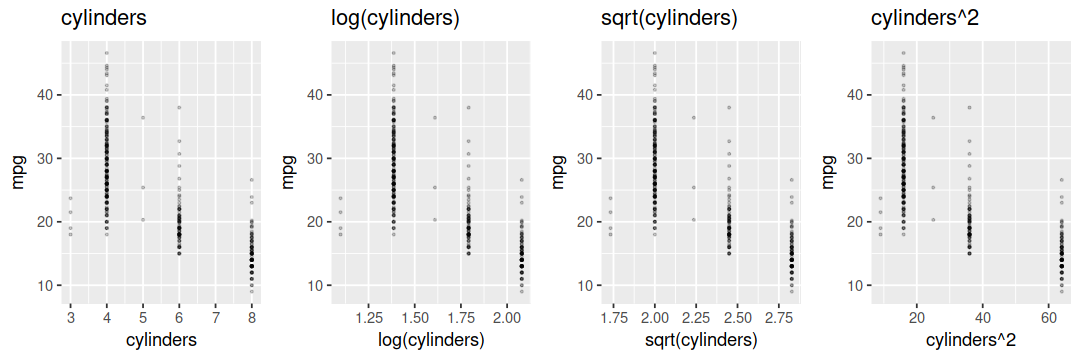

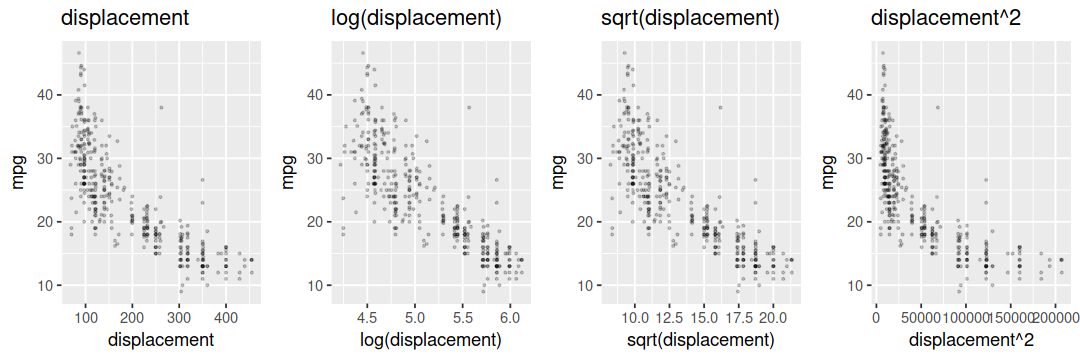

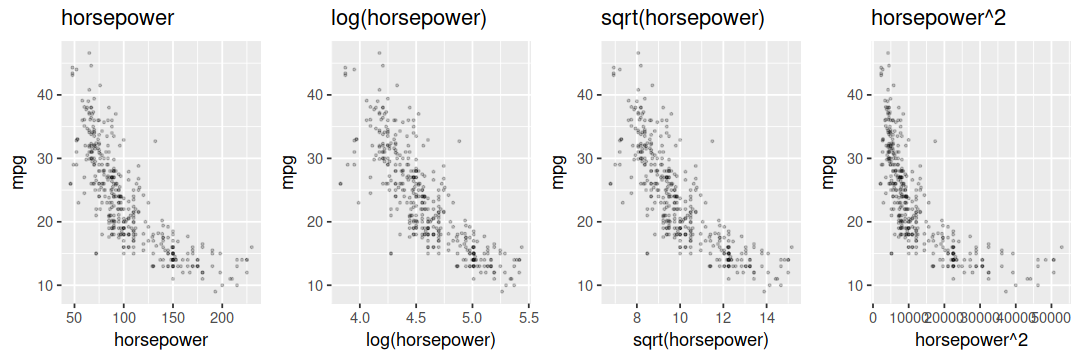

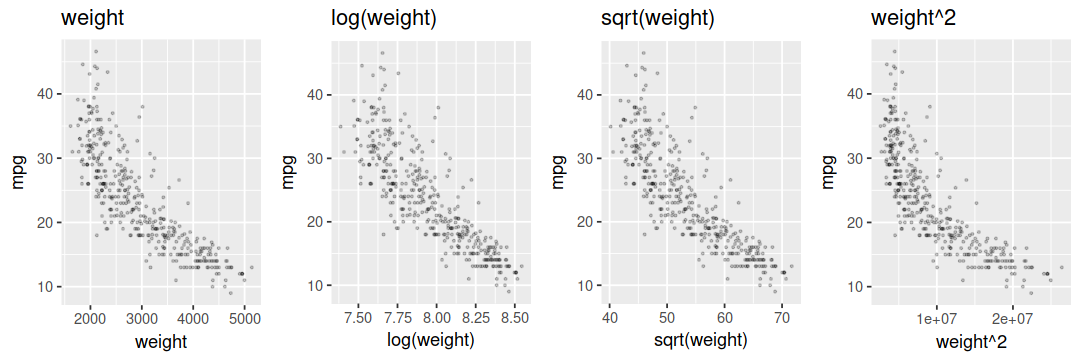

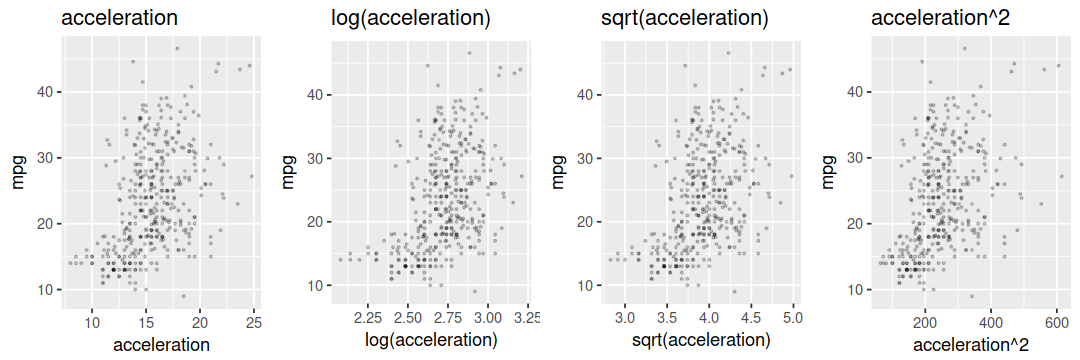

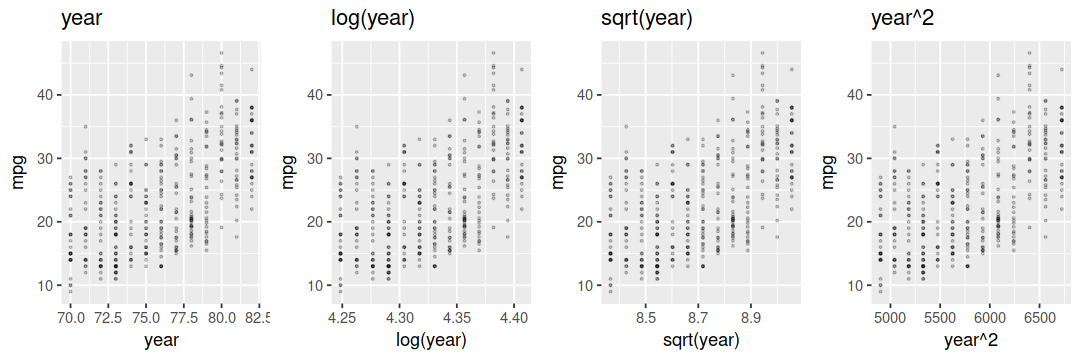

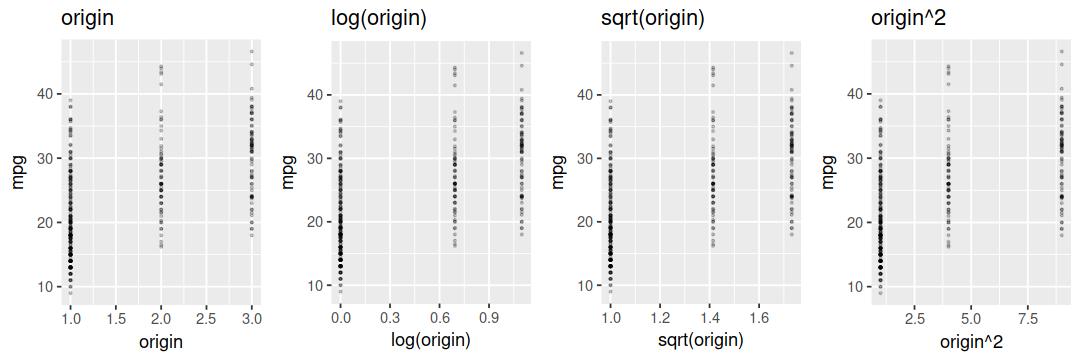

In [37]:
options(repr.plot.width = 9, repr.plot.height = 3)

auto.cols <- setdiff(names(Auto), c("name", "mpg"))

for (col in auto.cols) {
    transformations <- c(col, paste0("log(", col, ")"), 
                         paste0("sqrt(", col, ")"), paste0(col, "^2"))
    
    plots <- list()
    for (transf in transformations) {
        p <- ggplot(Auto, aes_string(transf, "mpg")) + 
               geom_point(size = 0.5, alpha = 0.2) + ggtitle(transf)
        plots <- c(plots, list(p))
    }
    
    do.call("grid.arrange", c(plots, ncol = 4))
}

**log(horsepower)** and **log(weight)** are good transformations.
Let’s remove **cylinders** from our model — we’ve seen it had not
statistical siginificante — and we will add these two new transformations.

In [38]:
lm.fit <- lm(mpg ~ . - cylinders + log(horsepower) + log(weight) +
             displacement:year + acceleration:year + acceleration:origin,
             data = auto.no.name)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - cylinders + log(horsepower) + log(weight) + 
    displacement:year + acceleration:year + acceleration:origin, 
    data = auto.no.name)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4612 -1.4912 -0.0875  1.2430 12.0757 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.904e+02  4.632e+01   6.268 1.00e-09 ***
displacement         5.325e-02  4.400e-02   1.210 0.226917    
horsepower           3.198e-02  3.064e-02   1.044 0.297372    
weight               4.917e-03  1.852e-03   2.655 0.008257 ** 
acceleration        -5.847e+00  1.358e+00  -4.306 2.13e-05 ***
year                -1.800e-01  3.418e-01  -0.527 0.598738    
origin              -3.678e+00  1.521e+00  -2.419 0.016037 *  
log(horsepower)     -8.820e+00  3.710e+00  -2.377 0.017938 *  
log(weight)         -2.782e+01  5.709e+00  -4.873 1.62e-06 ***
displacement:year   -8.125e-04  5.676e-04  -1.431 0.153152    
acceleration:year    6.957e-02  

Both transformations were good!

### Exercise 10

This question should be answered using the **Carseats** data set.

So this is a simulated data set containing sales of child car seats at 400 different stores, with 11 variables for each store.

**Variable** | **Description**
:- | :-
**Sales** | Unit sales (in thousands) at each location
**CompPrice** | Price charged by competitor at each location
**Income** | Community income level (in thousands of dollars)
**Advertising** | Local advertising budget for company at each location (in thousands of dollars)
**Population** | Population size in region (in thousands)
**Price** | Price company charges for car seats at each site
**ShelveLoc** | A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
**Age** | Average age of the local population
**Education** | Education level at each location
**Urban** | A factor with levels No and Yes to indicate whether the store is in an urban or rural location
**US** | A factor with levels No and Yes to indicate whether the store is in the US or not


In [39]:
head(Carseats)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1  9.50 138        73    11          276        120   Bad       42  17       
2 11.22 111        48    16          260         83   Good      65  10       
3 10.06 113        35    10          269         80   Medium    59  12       
4  7.40 117       100     4          466         97   Medium    55  14       
5  4.15 141        64     3          340        128   Bad       38  13       
6 10.81 124       113    13          501         72   Bad       78  16       
  Urban US 
1 Yes   Yes
2 Yes   Yes
3 Yes   Yes
4 Yes   Yes
5 Yes   No 
6 No    Yes

In [40]:
summary(Carseats$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   24.0   100.0   117.0   115.8   131.0   191.0 

#### Exercise 10a

Fit a multiple regression model to predict **Sales** using **Price**, **Urban**, and **US**.

In [41]:
lm.fit <- lm(Sales ~ Price + Urban + US, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


#### Exercise 10b

Provide an interpretation of each coeﬃcient in the model. Be careful—some of the variables in the model are qualitative!

First of all, we see that the F-statistic is high and the p-value (last row)
is very low, giving us strong evidence to reject the null hypothesis that all
coefficients are zero. Thus, at least one of the non-constant coefficients 
are non-zero.

Note also that **UrbanYes** has a high p-value; we analyze it regardless this.

- We can say that outside the US, 13 thousand child car seats were sold, whereas in US about more 1200 units are sold.
- For **UrbanYes**, we could say in urban areas fewer units are sold than rural areas,by an average of 21 units.
- As for the price change, an increase of 1 unit of **Price** leads to a decrease of the sales by 54 units.

#### Exercise 10c

Write out the model in equation form, being careful to handle the qualitative variables properly.

$$ Sales = 13.043469 - 0.054459 \times Price - 0.021916 \times UrbanYes + 1.200573 \times USYes + \epsilon$$

#### Exercise 10d

For which of the predictors can you reject the null hypothesis 
$H_0 : \beta_j = 0$?

**Price** and **USYes**, which have p-values lower than 5%.

#### Exercise 10e

On the basis of your response to the previous question, ﬁt a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [42]:
lm.fit <- lm(Sales ~ Price + US, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


#### Exercise 10f

How well do the models in (10a) and (10e) ﬁt the data?

Concerning the last model
- Adjusted R-squared has increased slightly (23.35% ⇒ 23.54%)
- F-statistic has increased (41.52 ⇒ 62.43)
- All predictors are relevant now

#### Exercise 10g

Using the model from (10e), obtain 95% conﬁdence intervals for the coeﬃcients.

In [43]:
confint(lm.fit)

2.5 %       97.5 %     
(Intercept) 11.79032020 14.27126531
Price       -0.06475984 -0.04419543
USYes        0.69151957  1.70776632

#### Exercise 10h

Is there evidence of outliers or high leverage observations in the model from (10e)?

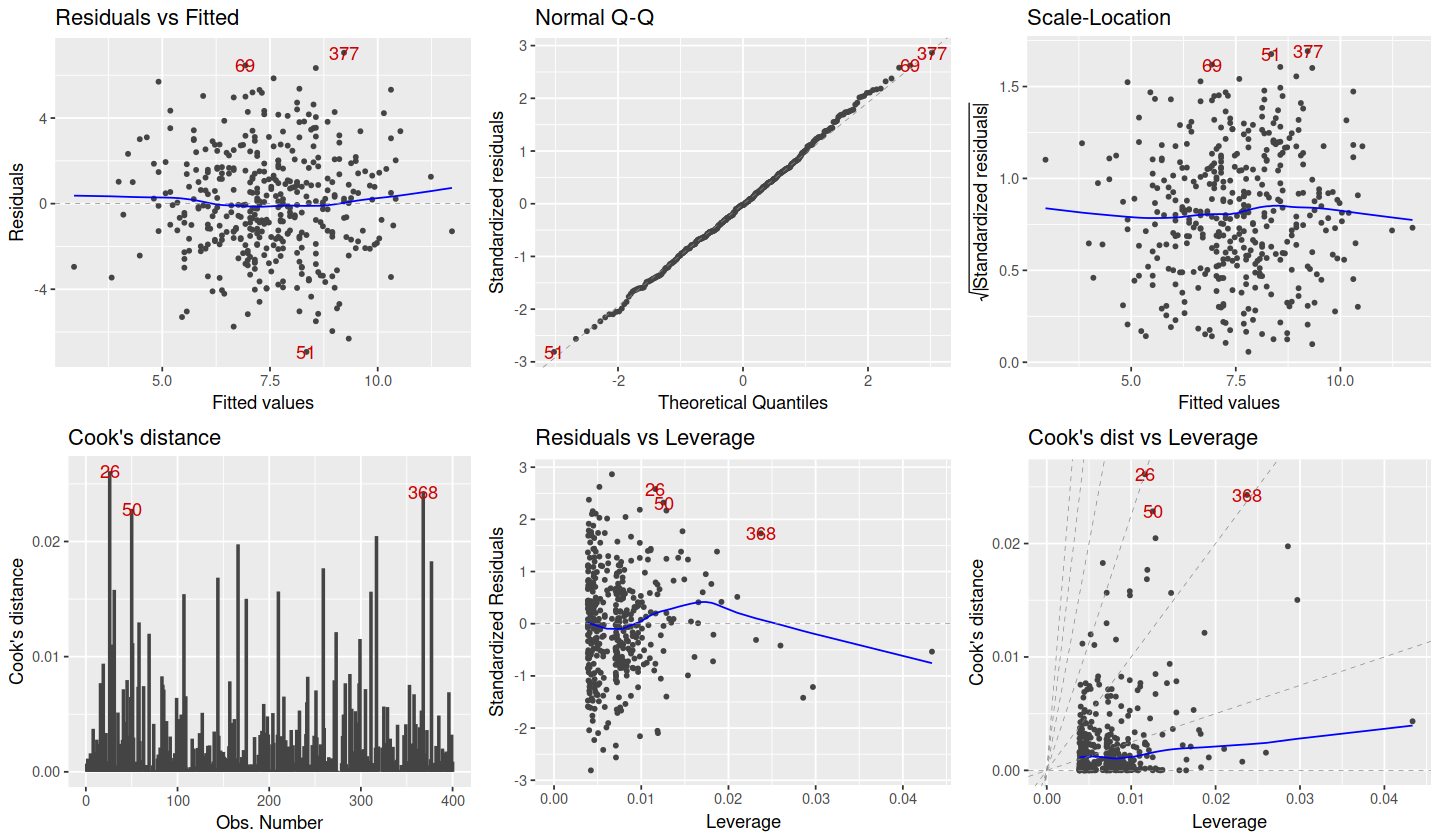

In [44]:
library("ggfortify")

options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)

All values appear to be bounded in the range (-3, +3), which seem to indicate
no presence of outliers.

### Exercise 11

In this problem we will investigate the t-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor **x** and a response **y** as follows.

In [45]:
set.seed(1)
x <- rnorm(100)
y <- 2 * x + rnorm(100)

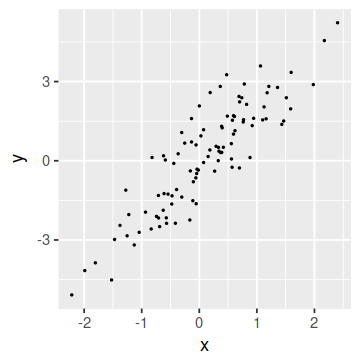

In [46]:
options(repr.plot.width = 3, repr.plot.height = 3)

ggplot(data.frame(x = x, y = y), aes(x, y)) + geom_point(size = 0.3)

#### Exercise 11a

Perform a simple linear regression of **y** onto **x**, without an intercept. Report the coeﬃcient estimate $\beta$, the standard error of this coeﬃcient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y ∼ x + 0)`.)

In [47]:
lm.fit <- lm(y ~ x - 1)
summary(lm.fit)


Call:
lm(formula = y ~ x - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


Since we know the actual function $f(x)$, we can see that the $\beta$ coefficient 1.9939
got close of the real coefficient 2.  By looking at the coefficient interval:

In [48]:
confint(lm.fit)

2.5 %    97.5 %  
x 1.782603 2.205149

We can note that the interval is very large even though the coefficient estimate
is very close to the actual.

Finally, we can see the p-value associated with the null hypothesis $H_0 : \beta$ 
is sufficiently low so we can reject the null hypothesis.

#### Exercise 11b

Now perform a simple linear regression of **x** onto **y** without an intercept, and report the coeﬃcient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [49]:
lm.fit <- lm(x ~ y - 1)
summary(lm.fit)


Call:
lm(formula = x ~ y - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


We also know the actual function here, $x = \frac{1}{2} (y - \epsilon)$.  Our coefficient estimate is
0.39. Let’s check the coefficient interval:

In [50]:
confint(lm.fit)

2.5 %     97.5 %   
y 0.3496717 0.4325574

I expected that the coefficient interval would include the actual $\beta = 0.5$. 
However, this coefficient interval does not.

#### Exercise 11c

What is the relationship between the results obtained in (11a) and (11b)?

In (11a) we approximated $y = 2x + \epsilon$, whereas in (11b) we approximated
the inverse function, $x = \frac{1}{2} (y - \epsilon)$.

Both (11a) and (11b) have the same $R^2$, F-statistic and its p-value.

#### Exercise 11d

For the regression of **y** onto **x** without an intercept, the t-statistic for 
$H_0 : \beta = 0$ takes the form $\frac{\hat\beta}{SE(\hat\beta)}$, where
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    },
$$
and
$$ 
SE(\hat\beta) = \sqrt{ 
    \frac{
        \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2
    }{
        \left( n - 1 \right) \sum_{i' = 1}^{n} x_{i'}^{2}
    }
}.
$$
(These formulas are slightly diﬀerent from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and conﬁrm numerically in R, that the t-statistic can be written as
$$
\frac{
    \left( \sqrt{n - 1} \right) \sum_{i = 1}^{n} x_i y_i
}{
    \sqrt{
        \left( \sum_{i = 1}^{n} x_i^2 \right)
        \left( \sum_{i' = 1}^{n} y_{i'}^{2} \right)
        \left( \sum_{i' = 1}^{n} x_{i'} y_{i'} \right)^2
    }
}.
$$

$$
t = 
\frac{
    % beta estimate
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    }
}{
    % Standard Error
    \sqrt{ 
        \frac{
            \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2
        }{
            \left( n - 1 \right) \sum_{i' = 1}^{n} x_{i'}^{2}
        }
    }    
}
$$

$$
= 
% beta estimate
\frac{
    \left(
        \sum_{i = 1}^{n} x_i y_i
    \right)
}{
    \left(
        \sum_{i' = 1}^{n} x_{i'}^{2}
    \right)
}
\cdot
% Standard Error
\sqrt{ 
    \frac{
        \left( n - 1 \right) \sum_{i' = 1}^{n} x_{i'}^{2}
    }{
        \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2
    }
}    
$$

$$
= 
\frac{
    \left( \sum_{i = 1}^{n} x_i y_i \right)
    \sqrt{ n - 1 }
    \left( \sum_{i' = 1}^{n} x_{i'}^{2} \right)^{\frac{1}{2}}
    \left( \sum_{i' = 1}^{n} x_{i'}^{2} \right)^{-1}
}{
    \sqrt{ \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2 }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ \sum_{i' = 1}^{n} x_{i'}^{2} \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2 }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} \left( y_i - 2 x_i y_i \hat\beta + x_i^2 \hat\beta^2 \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \sum_{i' = 1}^{n} x_{i'}^{2} \sum_{i = 1}^{n} \left( 2 x_i y_i \hat\beta + x_i^2 \hat\beta^2 \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \sum_{i' = 1}^{n} x_{i'}^{2} 2 \hat\beta 
        \sum_{i = 1}^{n} \left( x_i y_i + x_i^2 \hat\beta \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \sum_{i' = 1}^{n} x_{i'}^{2} 2 
            \frac{
                \left(
                    \sum_{i = 1}^{n} x_i y_i
                \right)
            }{
                \left(
                    \sum_{i' = 1}^{n} x_{i'}^{2}
                \right)
            }        
        \sum_{i = 1}^{n} 
        \left( 
            x_i y_i + x_i^2 
            \frac{
                \left(
                    \sum_{i = 1}^{n} x_i y_i
                \right)
            }{
                \left(
                    \sum_{i' = 1}^{n} x_{i'}^{2}
                \right)
            }            
        \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \left( \sum_{i = 1}^{n} x_i y_i \right)
        \left(
            2 
            \sum_{i = 1}^{n} x_i y_i - 
            \sum_{i = 1}^{n} x_i y_i
        \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \left( \sum_{i = 1}^{n} x_i y_i \right)^2
    }
}.
$$

Let’s confirm this result numerically.  In the output of the last call to
`summary(lm.fit)` we see that the t-statistic for $\hat\beta = 18.73$.
This formula should result in the same t-statistic.

In [51]:
t.statistic <- function(x, y) {
    n <- length(x)
    numerator <- sqrt(n - 1) * sum(x * y)
    denominator <- sqrt(sum(x ** 2) * sum(y ** 2) - sum(x * y) ** 2)
    numerator / denominator
}

t.statistic(x, y)

[1] 18.72593

#### Exercise 11e

Using the results from (11d), argue that the t-statistic for the regression of **y** onto **x** is the same as the t-statistic for the regression of **x** onto **y**.

If we swap **x** and **y** values, the t-statistic will be the same:

In [52]:
t.statistic(y, x)

[1] 18.72593

#### Exercise 11f

In `R`, show that when regression is performed with an intercept, the t-statistic for 
$H_0 : \beta_1 = 0$ is the same for the regression of **y** onto **x** as it is for the 
regression of **x** onto **y**.

In [53]:
lm.fit.y.onto.x <- lm(y ~ x)
lm.fit.x.onto.y <- lm(x ~ y)

display_markdown("**y** onto **x**")
summary(lm.fit.y.onto.x)$coefficients

display_markdown("**x** onto **y**")
summary(lm.fit.x.onto.y)$coefficients

**y** onto **x**

Estimate    Std. Error t value    Pr(>|t|)    
(Intercept) -0.03769261 0.09698729 -0.3886346 6.983896e-01
x            1.99893961 0.10772703 18.5555993 7.723851e-34

**x** onto **y**

Estimate   Std. Error t value    Pr(>|t|)    
(Intercept) 0.03880394 0.04266144  0.9095787 3.652764e-01
y           0.38942451 0.02098690 18.5555993 7.723851e-34

The t-statistic of $\beta_1$ is 18.5 for both regressions.

### Exercise 12

This problem involves simple linear regression without an intercept.

#### Exercise 12a

Recall that the coeﬃcient estimate $\hat\beta$ for the linear regression of **y** onto **x** without an intercept is given by
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    }.
$$
Under what circumstance is the coeﬃcient estimate for the regression of **x** onto **y** the same as the coeﬃcient estimate for the regression of **y** onto **x**?

For a linear regression of **y** onto **x** we have
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    },
$$
whereas for a linear regression of **x** onto **y** we have
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} y_{i'}^{2}
    }.
$$
Hence, the coefficient estimate is the same when 
$\sum_{i' = 1}^{n} x_{i'}^{2} = \sum_{i' = 1}^{n} y_{i'}^{2}$.

#### Exercise 12b

Generate an example in `R` with $n = 100$ observations in which the coeﬃcient estimate for the regression of **x** onto **y** is *diﬀerent from* the coeﬃcient estimate for the regression of **y** onto **x**.

In [54]:
compare.lm <- function(x, y) {
    a <- lm(y ~ x)
    b <- lm(x ~ y)
    cat(paste("Squared sums:", round(c(sum(x^2), sum(y^2)), digits = 2)), "\n")
    cat("y ~ x\n")
    print(coef(a))
    cat("x ~ y\n")
    print(coef(b))
}

set.seed(1)
x <- rnorm(100)
y <- 2 * x + rnorm(100, sd = 0.005)

compare.lm(x, y)

Squared sums: 81.06 Squared sums: 324.21 
y ~ x
  (Intercept)             x 
-0.0001884631  1.9999946981 
x ~ y
 (Intercept)            y 
0.0000950051 0.4999977714 


#### Exercise 12c

Generate an example in `R` with $n = 100$ observations in which the coeﬃcient estimate for the regression of **x** onto **y** is *the same as* the coeﬃcient estimate for the regression of **y** onto **x**.

In [55]:
set.seed(1)
x <- rnorm(100)
y <- -x + rnorm(100, sd = 0.006)

compare.lm(x, y)

Squared sums: 81.06 Squared sums: 81.06 
y ~ x
  (Intercept)             x 
-0.0002261557 -1.0000063623 
x ~ y
  (Intercept)             y 
-0.0002216871 -0.9999526973 


I added some irreducible error, but the coefficient are quite close.

### Exercise 13

In this exercise you will create some simulated data and will ﬁt simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (13a) to ensure consistent results.

#### Exercise 13a

Using the `rnorm()` function, create a vector, **x**, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, **x**.

In [56]:
set.seed(1)
x <- rnorm(100)

#### Exercise 13b

Using the `rnorm()` function, create a vector, **eps**, containing 100 observations drawn from a $N(0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [57]:
eps <- rnorm(100, sd = 0.25)

#### Exercise 13c

Using **x** and **eps**, generate a vector **y** according to the model
$y = -1 + 0.5 x + \epsilon$.
What is the length of the vector **y**? What are the values of 
$\beta_0$ and $\beta_1$ in this linear model?

In [58]:
y <- -1 + 0.5 * x + eps
lm.fit <- lm(y ~ x)
coef(lm.fit)

(Intercept)           x 
 -1.0094232   0.4997349

**y** has a length of 100, the same of **y** and **eps**.

#### Exercise 13d

Create a scatter plot displaying the relationship between **x** and **y**. Comment on what you observe.

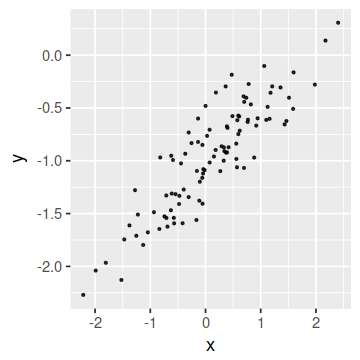

In [59]:
ggplot(data.frame(x, y), aes(x, y)) + geom_point(size = 0.5, alpha = 0.8)

It is a linear relationship, with **x** positively correlated with **y**.

#### Exercise 13e

Fit a least squares linear model to predict **y** using **x**. Comment on the model obtained. 
How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta-1$?

In [60]:
lm.fit <- lm(y ~ x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46921 -0.15344 -0.03487  0.13485  0.58654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00942    0.02425  -41.63   <2e-16 ***
x            0.49973    0.02693   18.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2407 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16


The adjusted $R^2$ of 77.62 is good, with a F-statistic high and a very low p-value, indicating strong relationship between **x** and **y** — we can reject the null hypothesis $H_0 : \beta_i = 0$ for $i = 0, 1$. The scatter plot already landed evidence for that, this is yet another evidence.  Both coefficients are significant.

We know the actual function, $y = -1 + 0.5 x + \epsilon$, where
$$
    \beta_0 = -1,
$$
$$
    \beta_1 = 0.5.
$$
The obtained coefficients are $\hat\beta = -1.01$ and $\hat\beta_1 = 0.5$, which are very close to the real ones.

#### Exercise 13f

Display the least squares line on the scatter plot obtained in (13d). Draw the population regression line on the plot, in a diﬀerent color. Use the `legend()` command to create an appropriate legend.

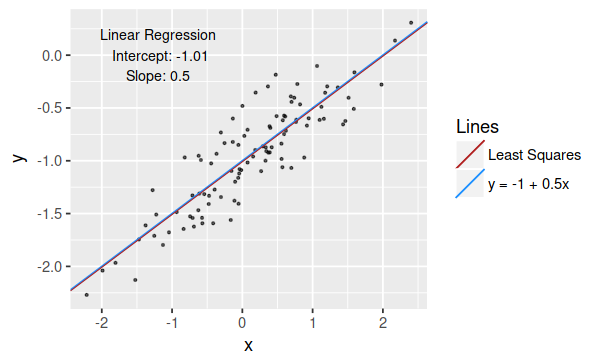

In [61]:
options(repr.plot.width = 5, repr.plot.height = 3)

line.spec <- paste("Linear Regression\n", paste(
    c("Intercept", "Slope"), 
    round(coef(lm.fit), digits = 2), 
    sep = ": ", 
    collapse = "\n"))

ggplot(data.frame(x, y), aes(x, y)) + 
    geom_point(size = 0.5, alpha = 0.6) + 
    geom_abline(
        aes(intercept = -1, 
            slope = 0.5, 
            color = "y = -1 + 0.5x"), 
        show.legend = TRUE) + 
    geom_abline(
        aes(intercept = coef(lm.fit)[1], 
            slope = coef(lm.fit)[2], 
            color = "Least Squares"), 
        size = 0.3,
        show.legend = TRUE) + 
    scale_colour_manual(values = c("firebrick", "dodgerblue")) +
    geom_text(
        data = data.frame(x = -1.2, y = 0), 
        map = aes(x = x, y = y), 
        label = line.spec,
        size = 3) +
    guides(colour = guide_legend(title = "Lines"))

#### Exercise 13g

Now ﬁt a polynomial regression model that predicts **y** using **x** and **x²**. 
Is there evidence that the quadratic term improves the model ﬁt? Explain your answer.

In [62]:
lm.fit <- lm(y ~ poly(x, 2))
summary(lm.fit)


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4913 -0.1563 -0.0322  0.1451  0.5675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.95501    0.02395 -39.874   <2e-16 ***
poly(x, 2)1  4.46612    0.23951  18.647   <2e-16 ***
poly(x, 2)2 -0.33602    0.23951  -1.403    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2395 on 97 degrees of freedom
Multiple R-squared:  0.7828,	Adjusted R-squared:  0.7784 
F-statistic: 174.8 on 2 and 97 DF,  p-value: < 2.2e-16


There is no evidence that **x²** improves the model, because the p-value of 0.164 
is too high, so we cannot reject the null hypothesis $H_0 : \beta_1 = 0$.

#### Exercise 13h

Repeat (13a)–(13f) after modifying the data generation process in such a way that there is *less* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (13b). Describe your results.

In [63]:
set.seed(1)
x <- rnorm(100)
eps <- rnorm(100, sd = 0.12)
y <- -1 + 0.5 * x + eps
lm.fit <- lm(y ~ x)
coef(lm.fit)

(Intercept)           x 
 -1.0045231   0.4998728

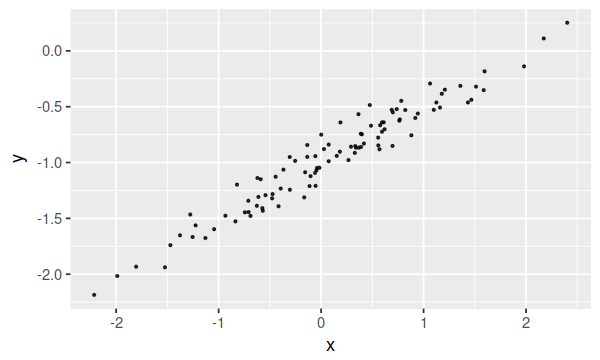

In [64]:
ggplot(data.frame(x, y), aes(x, y)) + geom_point(size = 0.5, alpha = 0.8)

We reduced the variance of the data.

In [65]:
lm.fit <- lm(y ~ x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22522 -0.07365 -0.01674  0.06473  0.28154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00452    0.01164  -86.31   <2e-16 ***
x            0.49987    0.01293   38.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1155 on 98 degrees of freedom
Multiple R-squared:  0.9385,	Adjusted R-squared:  0.9379 
F-statistic:  1495 on 1 and 98 DF,  p-value: < 2.2e-16


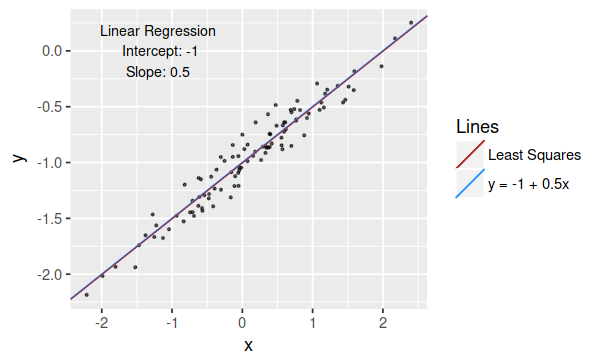

In [66]:
options(repr.plot.width = 5, repr.plot.height = 3)

line.spec <- paste("Linear Regression\n", paste(
    c("Intercept", "Slope"), 
    round(coef(lm.fit), digits = 2), 
    sep = ": ", 
    collapse = "\n"))

ggplot(data.frame(x, y), aes(x, y)) + 
    geom_point(size = 0.5, alpha = 0.6) + 
    geom_abline(
        aes(intercept = -1, 
            slope = 0.5, 
            color = "y = -1 + 0.5x"), 
        show.legend = TRUE) + 
    geom_abline(
        aes(intercept = coef(lm.fit)[1], 
            slope = coef(lm.fit)[2], 
            color = "Least Squares"),
        size = 0.3, 
        show.legend = TRUE) + 
    scale_colour_manual(values = c("firebrick", "dodgerblue")) +
    geom_text(
        data = data.frame(x = -1.2, y = 0), 
        map = aes(x = x, y = y), 
        label = line.spec,
        size = 3) +
    guides(colour = guide_legend(title = "Lines"))

The adjusted $R²$ has increased from 77.62% to 93.79%, and a decrease of the MSE from 0.2395 to 0.115, quite close from the reduction of the irreducible $\epsilon$, that we decreased from 0.25 to 0.11 — 0.2395 / 0.115 = *2.0826* and 0.25 / 11 = *2.0833*.

The coefficient themselves are still pretty close to the real $\beta$s, as we can see in the plot above the two lines are very close to one another.

#### Exercise 13g

Repeat (13a)–(13f) after modifying the data generation process in such a way that there is *more* noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (13b). Describe your results.

In [67]:
set.seed(1)
x <- rnorm(100)
eps <- rnorm(100, sd = 1)
y <- -1 + 0.5 * x + eps
lm.fit <- lm(y ~ x)
coef(lm.fit)

(Intercept)           x 
 -1.0376926   0.4989396

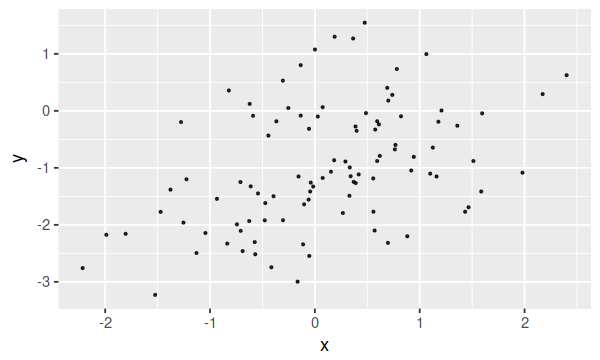

In [68]:
ggplot(data.frame(x, y), aes(x, y)) + geom_point(size = 0.5, alpha = 0.8)

This time we’ve double the standard error from where the irreducible error
is drawn.

In [69]:
lm.fit <- lm(y ~ x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8768 -0.6138 -0.1395  0.5394  2.3462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.03769    0.09699 -10.699  < 2e-16 ***
x            0.49894    0.10773   4.632 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9628 on 98 degrees of freedom
Multiple R-squared:  0.1796,	Adjusted R-squared:  0.1712 
F-statistic: 21.45 on 1 and 98 DF,  p-value: 1.117e-05


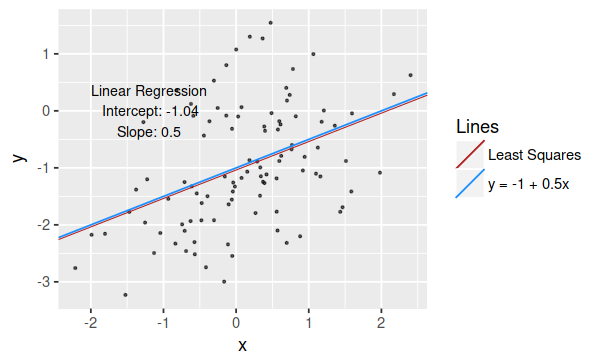

In [70]:
options(repr.plot.width = 5, repr.plot.height = 3)

line.spec <- paste("Linear Regression\n", paste(
    c("Intercept", "Slope"), 
    round(coef(lm.fit), digits = 2), 
    sep = ": ", 
    collapse = "\n"))

ggplot(data.frame(x, y), aes(x, y)) + 
    geom_point(size = 0.5, alpha = 0.6) + 
    geom_abline(
        aes(intercept = -1, 
            slope = 0.5, 
            color = "y = -1 + 0.5x"), 
        show.legend = TRUE) + 
    geom_abline(
        aes(intercept = coef(lm.fit)[1], 
            slope = coef(lm.fit)[2], 
            color = "Least Squares"), 
        size = 0.3,
        show.legend = TRUE) + 
    scale_colour_manual(values = c("firebrick", "dodgerblue")) +
    geom_text(
        data = data.frame(x = -1.2, y = 0), 
        map = aes(x = x, y = y), 
        label = line.spec,
        size = 3) +
    guides(colour = guide_legend(title = "Lines"))

The MSE is twice as high as the MSE of the first model, 0.4814 / 0.2407 = 2,
following the amount of variance we have increased.

The adjusted $R^2$ decreased from 77.62% to 46.19%.
When we reduced the error by half, the $R^2$ had increased 16.17 percentage points (pp). 
This time we doubled it and the $R^2$ decreased 31.43 pp.

The $\hat\beta$s are slightly different, and the plot above shows the two lines slightly more separate.

#### Exercise 13j

What are the conﬁdence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [71]:
confint.dataset <- function(sd) {
    set.seed(1)
    x <- rnorm(100)
    eps <- rnorm(100, sd = sd)
    y <- -1 + 0.5 * x + eps
    model <- lm(y ~ x)
    cat("sd =", sd, "\n")
    confint(model)
}

confint.dataset(0.25)
confint.dataset(0.5)
confint.dataset(0.12)

sd = 0.25 


2.5 %      97.5 %    
(Intercept) -1.0575402 -0.9613061
x            0.4462897  0.5531801

sd = 0.5 


2.5 %      97.5 %    
(Intercept) -1.1150804 -0.9226122
x            0.3925794  0.6063602

sd = 0.12 


2.5 %      97.5 %    
(Intercept) -1.0276193 -0.9814269
x            0.4742191  0.5255264

The confidence intervals of the coefficients increase together with the  
irreducible error $\epsilon$ we add to the data.  This means the less noise
we have on the data, the more tight the confidence intervals become.

### Exercise 14

This problem focuses on the collinearity problem.

In [72]:
set.seed(1)
x1 <- runif(100)
x2 <- 0.5 * x1 + rnorm(100) / 10
y <- 2 + 2 * x1 + 0.3 * x2 + rnorm(100)

#### Exercise 14a

The last line corresponds to creating a linear model in which **y** is a function of **x1** and **x2**. Write out the form of the linear model. What are the regression coeﬃcients?

The linear model is
$$y = f(x) + \epsilon,$$
$$f(x) = 2 + 2 x_1 + 0.3 x_2,$$
where $\epsilon \sim N(0, 1)$. The regression coefficients are 
$$\beta_0 = 2,$$
$$\beta_1 = 2,$$
$$\beta_2 = 0.3.$$

#### Exercise 14b

What is the correlation between **x1** and **x2**? Create a scatterplot displaying the relationship between the variables.

In [73]:
cor(x1, x2)

[1] 0.8351212

**x1** and **x2** are highly correlated.

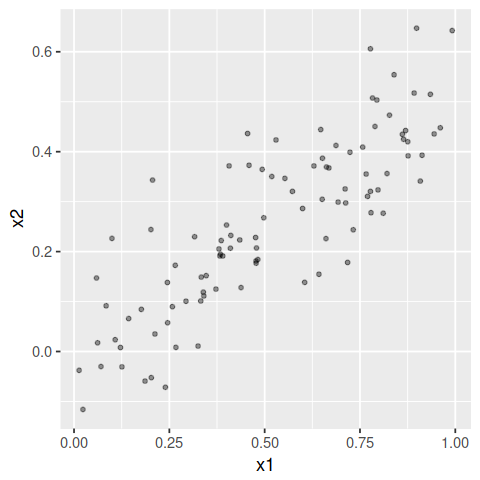

In [74]:
options(repr.plot.width = 4, repr.plot.height = 4)

ggplot(data.frame(x1, x2), aes(x1, x2)) + geom_point(size = 1, alpha = 0.4)

#### Exercise 14c

Using this data, ﬁt a least squares regression to predict **y** using **x1** and **x2**. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$, and $\hat\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [75]:
lm.fit <- lm(y ~ x1 + x2)
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


The coefficients are $\hat\beta_0 = 2.13, \hat\beta_1 = 1.44, \hat\beta_2 = 1.01$.
The intercept $\hat\beta_0$ is close to the real $\beta_0$, but the others have a high standard error. The null hypothesis $H_0 : \beta_1 = 0$ has a p-value of 4.9%, which is suggests that null hypothesis might be rejected; however, the null hypothesis $H_0 : \beta_2 = 0$ has a p-value of 37.5%, so it cannot be rejected.

#### Exercise 14d

Now ﬁt a least squares regression to predict **y** using only **x1**. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [76]:
lm.fit <- lm(y ~ x1)
summary(lm.fit)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


The MSE and the adjusted $R²$ remain about the same; the F-statistic, on the other hand, increased from 12.8 to 24.86.  Without **x2**, the null hypothesis $H_0 : \beta_1 = 0$ can be safely rejected.  Furthermore, the standard error of **x1** coefficient decreased a lot from 0.72 to 0.39.

#### Exercise 14e

Now ﬁt a least squares regression to predict **y** using only **x2**. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [77]:
lm.fit <- lm(y ~ x2)
summary(lm.fit)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


The MSE increased slightly from 1.056 to 1.072 and the adjusted $R²$ decreased from 19.2% to 16.8%. The F-statistic, increased from 12.8 to 20.98, but it is lower than **x1**’s 24.86.  Without **x1**, the null hypothesis $H_0 : \beta_1 = 0$ can be safely rejected.

#### Exercise 14f

Do the results obtained in (14c)–(14e) contradict each other? Explain your answer.

They do not contradict. This is due to the collinearity of **x1** and **x2**. When they are both used together, the individual results may be misleading regarding of how each predictor is related to the dependent variable **y**.  One consequence of collinearity is also a high standard error for each predictor coefficient $\hat\beta$ when they are used together.  This standard error is used for the t-statistic; thus, a high standard error lead to a failure when trying to reject a null hypothesis that the coefficient is zero.

#### Exercise 14g

Now suppose we obtain one additional observation, which was unfortunately mismeasured.

In [78]:
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8)
y <- c(y, 6)

Re-ﬁt the linear models from (c) to (e) using this new data. What eﬀect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [79]:
lm.fit.both <- lm(y ~ x1 + x2)
lm.fit.x1 <- lm(y ~ x1)
lm.fit.x2 <- lm(y ~ x2)
summary(lm.fit.both)
summary(lm.fit.x1)
summary(lm.fit.x2)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06



Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05



Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


The MSE in all the three models increased with the new observation. The model with both predictors has **x1**’s t-statistic p-valud shifted to a large value that we cannot reject the respective null hypothesis. The model with **x2** had the best fir so far. Let’s use the diagnostic plots for each one.

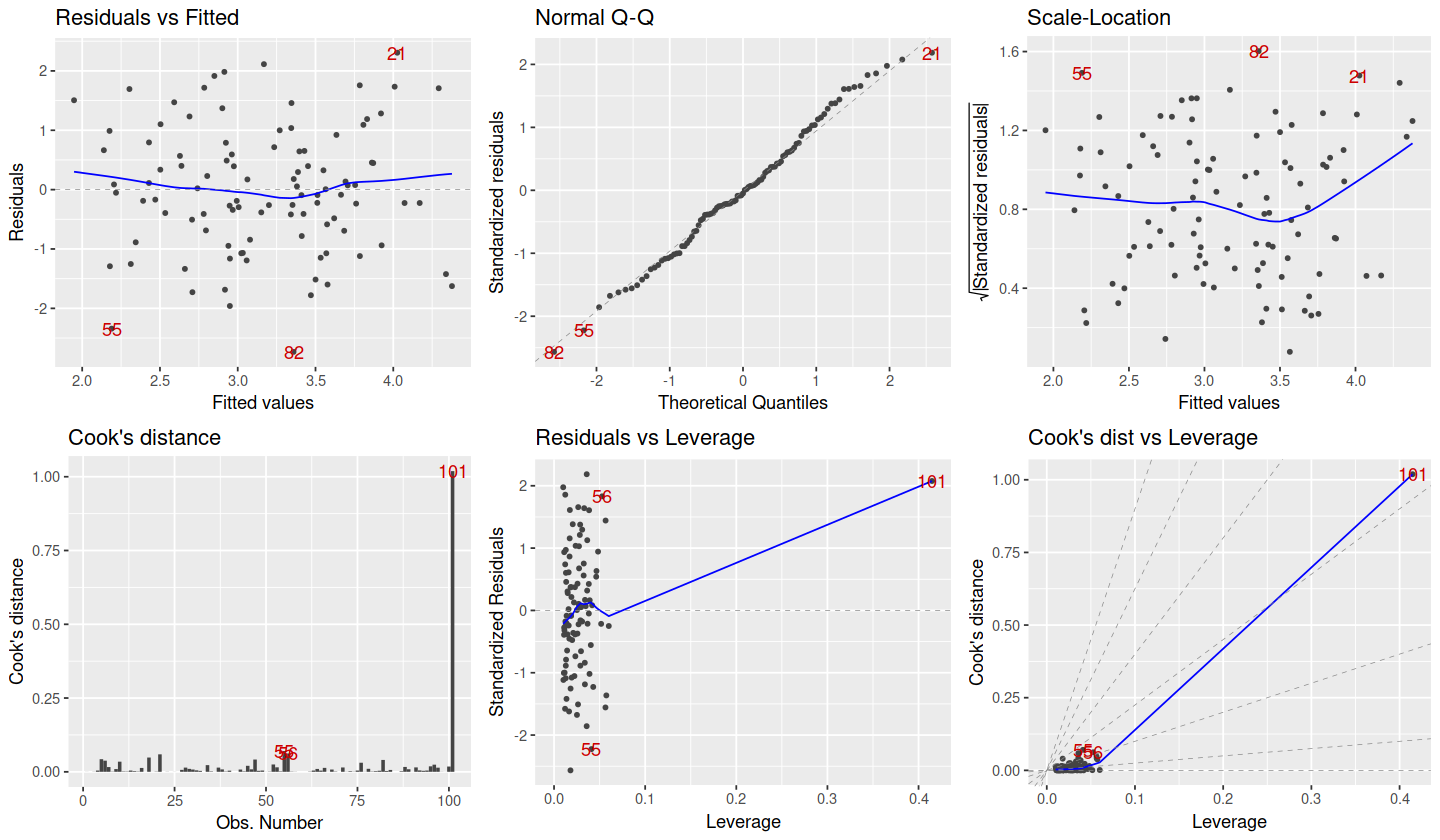

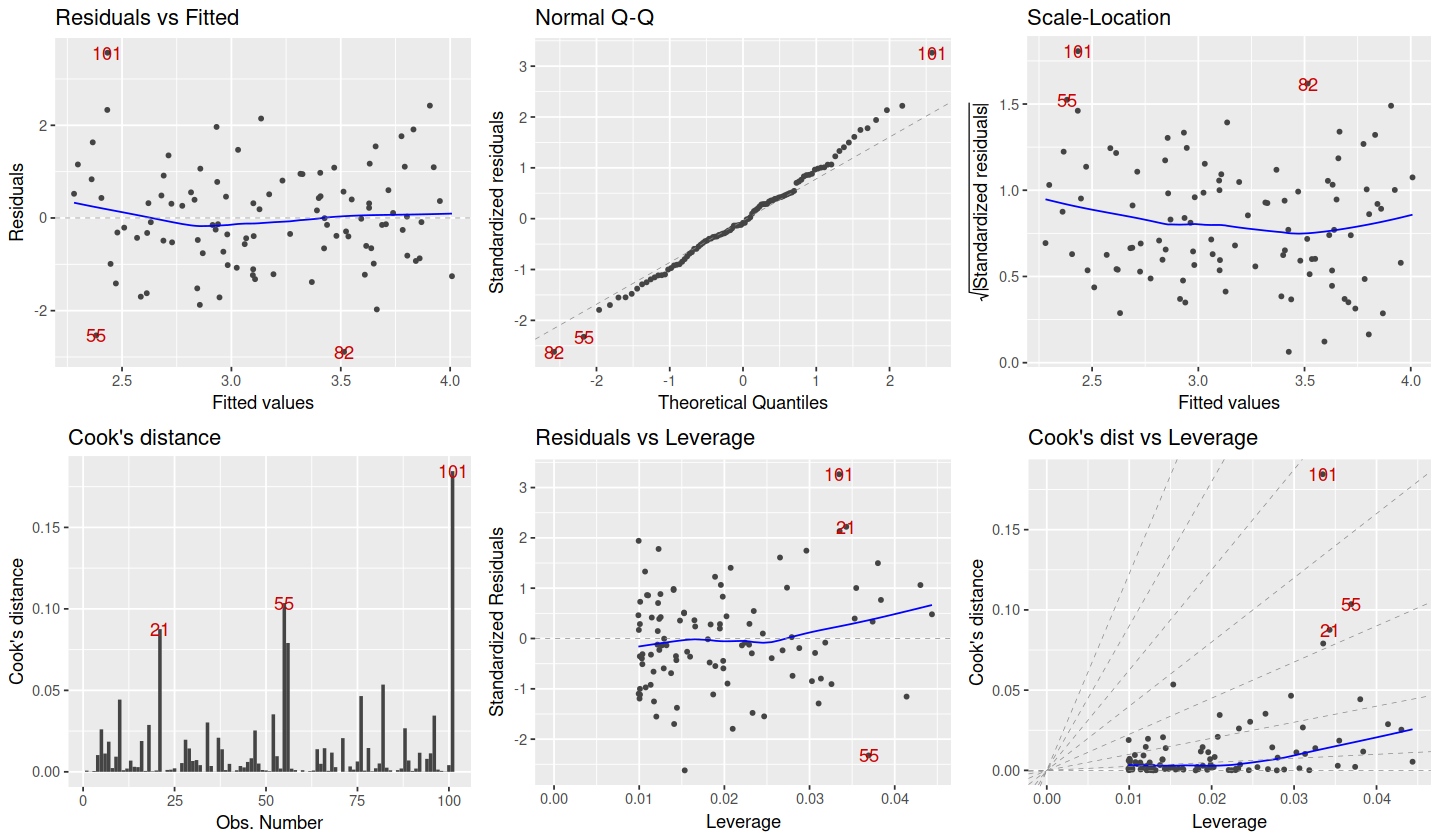

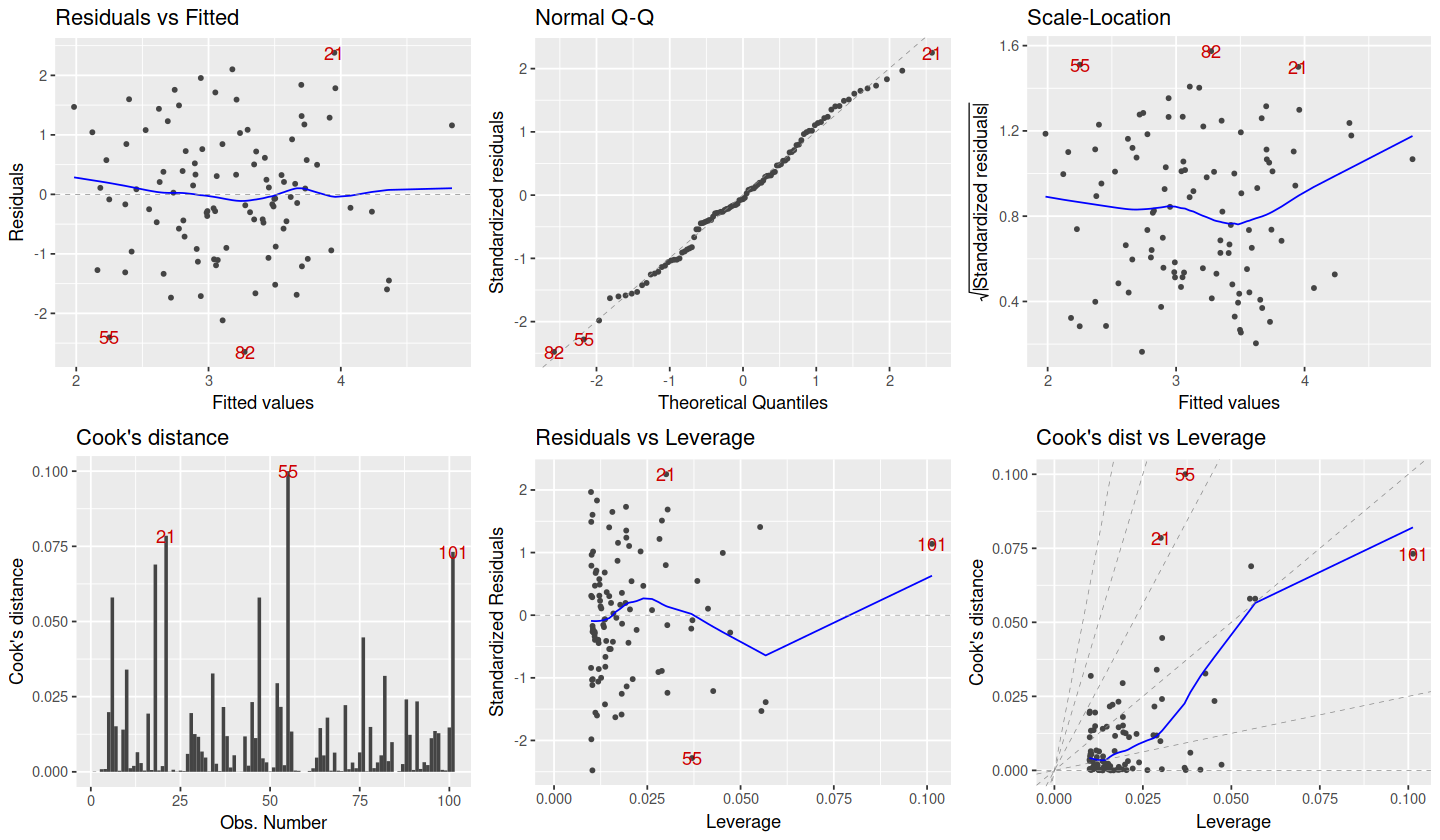

In [80]:
library("ggfortify")

options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit.both, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)
autoplot(lm.fit.x1, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)
autoplot(lm.fit.x2, which = 1:6, size = 1, label.colour = "#cc0000", ncol = 3)

The new observation severely affects the first model, strongly the second, and
significantly the third model.

- In the first model, $y \sim x_1 + x_2$, the observation is **a high-leverage point**
- In the second model, $y \sim x_1$, the observation is **an outlier**
- In the third model, $y \sim x_2$, the observation is **a high-leverage point**

### Exercise 15

This problem involves the **Boston** data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [81]:
library("MASS")

In [82]:
head(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

#### Exercise 15a

For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions.

In [83]:
fit.model <- function(predictor) {
    model <- lm(as.formula(paste("crim ~", predictor)), data = Boston)
    print(round(summary(model)$coefficients, digits = 4))
    f <- summary(model)$fstatistic
    p <- pf(f[1], f[2], f[3], lower.tail = FALSE)
    print(p)
    # print(autoplot(model, which = 1:6, size = 1, label.colour = '#cc0000', 
    # ncol = 3, title = predictor))
}

for (pred in setdiff(names(Boston), "crim")) fit.model(pred)

            Estimate Std. Error t value Pr(>|t|)
(Intercept)   4.4537     0.4172 10.6747        0
zn           -0.0739     0.0161 -4.5938        0
       value 
5.506472e-06 
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -2.0637     0.6672 -3.0930   0.0021
indus         0.5098     0.0510  9.9908   0.0000
       value 
1.450349e-21 
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   3.7444     0.3961  9.4530   0.0000
chas         -1.8928     1.5061 -1.2567   0.2094
    value 
0.2094345 
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -13.7199     1.6995  -8.073        0
nox          31.2485     2.9992  10.419        0
       value 
3.751739e-23 
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  20.4818     3.3645  6.0877        0
rm           -2.6841     0.5320 -5.0448        0
       value 
6.346703e-07 
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -3.7779     0.9440 -4.0021    1e-04
age           0.1078     0.0127  

Separately, we can reject the null hypothesis of $H_0 : \beta = 0$ for all predictors except **chas** .

#### Exercise 15b

Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [84]:
lm.fit <- lm(crim ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 ‘***’ 0.0

We can reject the null hypothesis for **zn**, **dis**, **rad**, **black**, and **medv**.

#### Exercise 15c

How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coeﬃcients from (a) on the x-axis, and the multiple regression coeﬃcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

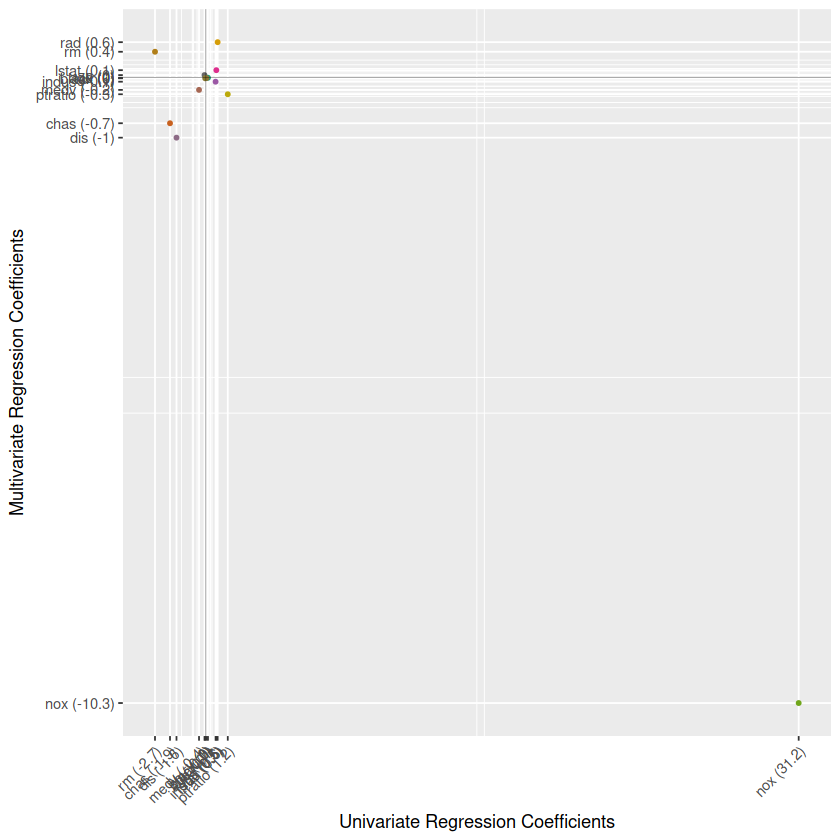

In [85]:
library("foreach")

options(repr.plot.width = 7, repr.plot.height = 7)

fit.model <- function(predictor) {
    model <- lm(as.formula(paste("crim ~", predictor)), data = Boston)
    summary(model)$coefficients[2]
}

predictors <- setdiff(names(Boston), "crim")

x.coefficients <- foreach(pred = predictors, .combine = 'c') %do%
    fit.model(pred)

lm.fit <- lm(crim ~ ., data = Boston)
y.coefficients <- summary(lm.fit)$coefficients[-1, 1]

coefficients <- as.data.frame(cbind(
    x = x.coefficients, 
    y = y.coefficients,
    predictor = factor(predictors)))

format.label.coef <- function(predictor, coef) {
    paste0(predictor, " (", round(coef, digits = 1), ")")
}

ggplot(coefficients, aes(x, y, colour = factor(predictor))) + 
    geom_point(size = 1) +
    scale_x_continuous(limits = c(min(x.coefficients), max(x.coefficients)),
                       breaks = x.coefficients,
                       labels = format.label.coef(predictors, x.coefficients)) +
    scale_y_continuous(limits = c(min(y.coefficients), max(y.coefficients)),
                       breaks = y.coefficients,
                       labels = format.label.coef(predictors, y.coefficients)) +
    geom_vline(xintercept = 0, size = 0.1) +
    geom_hline(yintercept = 0, size = 0.1) +
    scale_colour_manual(values = colorRampPalette(brewer.pal(8, "Dark2"))(13)) +
    xlab("Univariate Regression Coefficients") +
    ylab("Multivariate Regression Coefficients") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    guides(colour = FALSE)

Particularly, **nox** has a coefficient 31.2 on $y \sim NO_x$, but its coefficient
on the multivariate model is -10.3.

This and the other differences are because of differences that affect how we 
interpret the univariate and multivariate models.  In univariate, the slope, 
$\beta_1$ is interpreted as how much a change in the predictor affects the 
dependent variable.  In the multivariate cases, this interpretation is done
by holding fixed all the other predictors.  Moreover, when we have collinearity,
only one of the predictors may be used, while the other can be near zero.

Let’s see the correlation matrix:

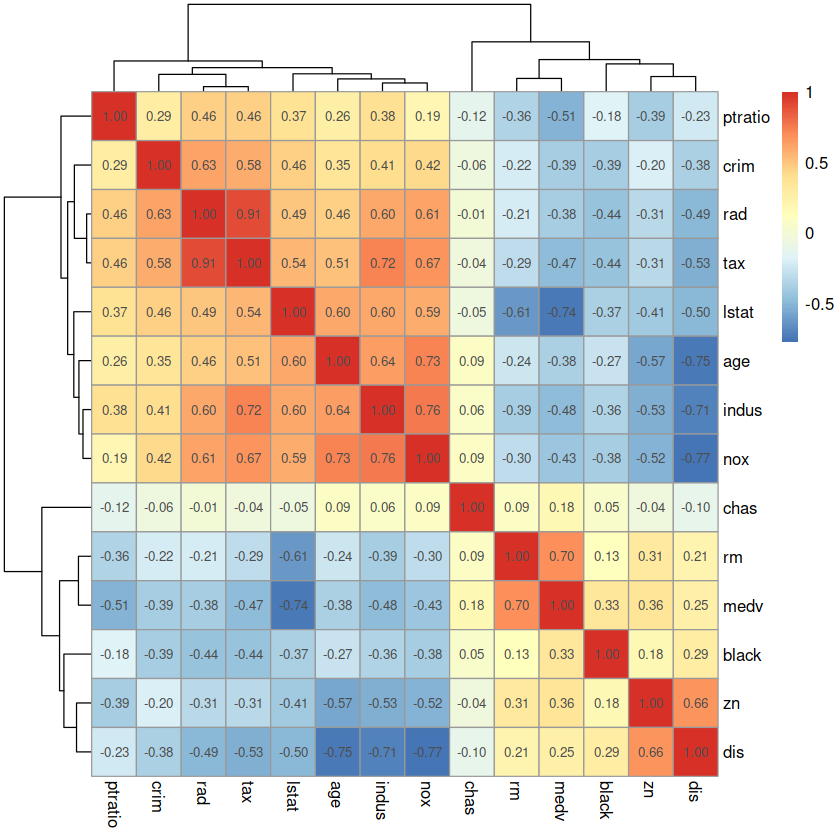

In [86]:
pheatmap(cor(Boston), display_numbers = TRUE)

For instance, we know **nox** coefficient in the univariate model is 31.2. If we add **nox** and its three positively correlated
predictors, **tax**, **rad**, and **data**, we get these coefficients:

In [87]:
coef(lm(crim ~ nox + age + tax + rad, data = Boston))

(Intercept)          nox          age          tax          rad 
-3.931156626 -0.457051111  0.025800886  0.001899802  0.550122249

#### Exercise 15d

Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, ﬁt a model of the form
$$
    y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon.
$$

In [88]:
fit.model <- function(predictor) {
    formula <- paste0("crim ~ poly(", predictor, ", 3)")
    model <- lm(as.formula(formula), data = Boston)
    print(formula)
    print(summary(model))
}

predictors <- setdiff(names(Boston), c("crim", "chas"))

for (predictor in predictors) fit.model(predictor)

[1] "crim ~ poly(zn, 3)"

Call:
lm(formula = as.formula(formula), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.821 -4.614 -1.294  0.473 84.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3722   9.709  < 2e-16 ***
poly(zn, 3)1 -38.7498     8.3722  -4.628  4.7e-06 ***
poly(zn, 3)2  23.9398     8.3722   2.859  0.00442 ** 
poly(zn, 3)3 -10.0719     8.3722  -1.203  0.22954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.372 on 502 degrees of freedom
Multiple R-squared:  0.05824,	Adjusted R-squared:  0.05261 
F-statistic: 10.35 on 3 and 502 DF,  p-value: 1.281e-06

[1] "crim ~ poly(indus, 3)"

Call:
lm(formula = as.formula(formula), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.278 -2.514  0.054  0.764 79.713 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.614      0.330  10.950  < 2e-16 ***
poly(indus,

##### Degree 2

In [89]:
deg2 <- setdiff(names(Boston), c("crim", "chas", "black"))
deg2

[1] "zn"      "indus"   "nox"     "rm"      "age"     "dis"     "rad"    
 [8] "tax"     "ptratio" "lstat"   "medv"

##### Degree 3

In [90]:
deg3 <- setdiff(names(Boston), c("crim", "chas", "zn", "rm", "rad", "tax", 
                                 "black", "lstat"))
deg3

[1] "indus"   "nox"     "age"     "dis"     "ptratio" "medv"

Let’s fit the model with all these predictors.

In [91]:
formula <- "crim ~ . - chas"

for (predictor in setdiff(deg2, deg3)) 
    formula <- paste0(formula, " + poly(", predictor, ", 2)")

for (predictor in deg3) 
    formula <- paste0(formula, " + poly(", predictor, ", 3)")

cat("Model:", formula, "\n")
model <- lm(as.formula(formula), data = Boston)
summary(model)

Model: crim ~ . - chas + poly(zn, 2) + poly(rm, 2) + poly(rad, 2) + poly(tax, 2) + poly(lstat, 2) + poly(indus, 3) + poly(nox, 3) + poly(age, 3) + poly(dis, 3) + poly(ptratio, 3) + poly(medv, 3) 



Call:
lm(formula = as.formula(formula), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.285  -1.586  -0.126   1.048  68.323 

Coefficients: (11 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        36.913347   7.876818   4.686 3.64e-06 ***
zn                 -0.001412   0.022594  -0.062 0.950194    
indus               0.025422   0.084228   0.302 0.762918    
nox               -20.350572   6.753852  -3.013 0.002723 ** 
rm                 -0.079071   0.618652  -0.128 0.898351    
age                -0.004994   0.018519  -0.270 0.787510    
dis                -1.046078   0.311480  -3.358 0.000847 ***
rad                 0.589170   0.197489   2.983 0.002998 ** 
tax                -0.011417   0.008516  -1.341 0.180667    
ptratio            -0.310479   0.184435  -1.683 0.092952 .  
black              -0.003507   0.003338  -1.051 0.293955    
lstat              -0.224181   0.079586  -2.817 0.005051 ** 


In [92]:
model <- lm(crim ~ . - chas + poly(dis, 3) + poly(medv, 3), data = Boston)
summary(model)


Call:
lm(formula = crim ~ . - chas + poly(dis, 3) + poly(medv, 3), 
    data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.271  -1.887  -0.177   1.187  68.726 

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     40.301009   7.032218   5.731 1.75e-08 ***
zn              -0.010382   0.017650  -0.588 0.556652    
indus           -0.023929   0.075384  -0.317 0.751058    
nox            -20.484963   4.985064  -4.109 4.65e-05 ***
rm              -0.558906   0.577351  -0.968 0.333497    
age             -0.005581   0.016604  -0.336 0.736932    
dis             -1.227785   0.285519  -4.300 2.06e-05 ***
rad              0.601716   0.078507   7.665 9.74e-14 ***
tax             -0.011829   0.004641  -2.548 0.011124 *  
ptratio         -0.277380   0.170360  -1.628 0.104126    
black           -0.003726   0.003287  -1.134 0.257516    
lstat           -0.213164   0.074349  -2.867 0.004322 ** 
medv    